# Latent vector projection

Find the latent vector that will produce an output looks almost exactly like the real cat, and pass that latent vector to fine-tuned water cat model to generate watercolor cat iamges.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!git clone https://github.com/justinpinkney/stylegan2
%cd stylegan2
!nvcc test_nvcc.cu -o test_nvcc -run

fatal: destination path 'stylegan2' already exists and is not an empty directory.
/content/stylegan2
CPU says hello.
GPU says hello.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pretrained_networks

anime_cat_url = "/content/drive/My Drive/CS 230/anime_cat.pkl" 
blended_url = "/content/drive/My Drive/CS 230/cat_blended.pkl" 
blended_16_url = "/content/drive/My Drive/CS 230/cat_blended_16.pkl" 
real_cat_url = "/content/drive/My Drive/CS 230/real_cat.pkl" 

_, _, Gs_anime = pretrained_networks.load_networks(anime_cat_url)
_, _, Gs_blended = pretrained_networks.load_networks(blended_url)
_, _, Gs_blended_16 = pretrained_networks.load_networks(blended_16_url)
_, _, Gs = pretrained_networks.load_networks(real_cat_url)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.


In [ ]:
!python project_images.py --network-pkl /content/drive/My\ Drive/CS\ 230/real_cat.pkl  --num-steps 500 raw generated

Loading networks from "/content/drive/My Drive/CS 230/real_cat.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loading images from ".stylegan2-tmp/dataset/images"
detected 1 images ...
Creating dataset ".stylegan2-tmp/dataset/tfrecords"
Adding the images to tfrecords ...
added images 0
Added 1 images.
Projecting image "00001247_023.jpg"...
0 / 500 ... 2020-11-03 01:07:29.901972: W tensorflow/core/common_runtime/bfc_allocator.cc:305] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like t

In [ ]:
import numpy as np
from PIL import Image
import dnnlib
import dnnlib.tflib as tflib
from pathlib import Path

latent_dir = Path("/content/drive/My Drive/CS 230/test_generated")
save_dir = Path("/content/drive/My Drive/CS 230/test_output")
latents = latent_dir.glob("*.npy")
for latent_file in latents:
  latent = np.load(latent_file)
  latent = np.expand_dims(latent,axis=0)
  synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=8)
  images = Gs_blended_16.components.synthesis.run(latent, randomize_noise=False, **synthesis_kwargs)
  Image.fromarray(images.transpose((0,2,3,1))[0], 'RGB').save(save_dir / (f"{latent_file.stem}-blended16.jpg"))


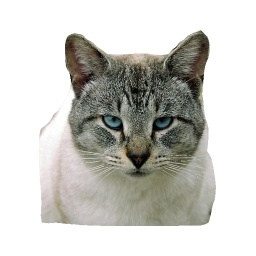

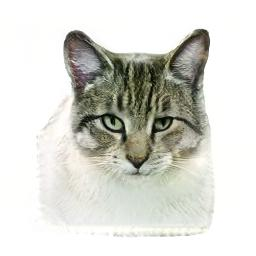

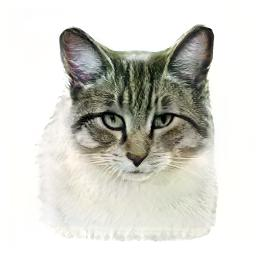

In [ ]:
from IPython.display import Image 
embedded = Image(filename="/content/drive/My Drive/CS 230/test_raw/00001247_023.jpg", width=256)
display(embedded)
tooned = Image(filename="/content/drive/My Drive/CS 230/test_output/00001247_023-blended.jpg", width=256)
display(tooned)
tooned = Image(filename="/content/drive/My Drive/CS 230/test_output/00001247_023-blended16.jpg", width=256)
display(tooned)